In [2]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import matplotlib.pyplot as plt

In [18]:
'''
input: year integer
output: two floats, home win percentage and away win percentage
'''
def grab_wins(year):
    url = "https://www.nfl.com/standings/league/" + str(year) + "/reg/"
    page = requests.get(url)

    soup = BeautifulSoup(page.content, 'html.parser')

    # print(soup)
    rows = soup.find_all('tr')

    # home = []
    # road = []

    home_wins_total = 0
    home_losses_total = 0

    away_wins_total = 0
    away_losses_total = 0

    for row in rows[1:]:
        each_columm = row.find_all('td')

        home_string = each_columm[8].string.replace(" ", "").replace("\n", "")
        away_string = each_columm[9].string.replace(" ", "").replace("\n", "")

        home_score = home_string.split("-")
        home_wins = home_score[0]
        home_losses = home_score[1]

        # update totals
        home_wins_total += int(home_wins)
        home_losses_total += int(home_losses)

        away_score = away_string.split("-")
        away_wins = away_score[0]
        away_losses = away_score[1]

        # update totals
        away_wins_total += int(away_wins)
        away_losses_total += int(away_losses)

        # home.append(home_string)
        # road.append(away_string)

    home_win_percentage = home_wins_total / (home_wins_total + home_losses_total)
    away_win_percentage = away_wins_total / (away_wins_total + away_losses_total)
    return home_win_percentage, away_win_percentage

In [19]:
win_percent_total = 0
lose_percent_total = 0
total_count = 0

win_losses = {}

for year in range(1970, 2021):
    print(year, grab_wins(year))
    win_losses[year] = grab_wins(year)
    
    result = grab_wins(year)
    win_percent_total += result[0]
    lose_percent_total += result[1]
    total_count += 1

# print("WIN PERCENT AVG", win_percent_total/total_count)
# print("LOSE PERCENT AVG", lose_percent_total/total_count)

1970 (0.5838150289017341, 0.4161849710982659)
1971 (0.5747126436781609, 0.42528735632183906)
1972 (0.5084745762711864, 0.4915254237288136)
1973 (0.6228571428571429, 0.37714285714285717)
1974 (0.5469613259668509, 0.4530386740331492)
1975 (0.554945054945055, 0.44505494505494503)
1976 (0.5743589743589743, 0.4256410256410256)
1977 (0.576530612244898, 0.42346938775510207)
1978 (0.5829596412556054, 0.4170403587443946)
1979 (0.5892857142857143, 0.4107142857142857)
1980 (0.547085201793722, 0.452914798206278)
1981 (0.6233183856502242, 0.37668161434977576)
1982 (0.544, 0.456)
1983 (0.5336322869955157, 0.4663677130044843)
1984 (0.57847533632287, 0.42152466367713004)
1985 (0.6428571428571429, 0.35714285714285715)
1986 (0.5315315315315315, 0.46846846846846846)
1987 (0.5454545454545454, 0.45454545454545453)
1988 (0.5874439461883408, 0.4125560538116592)
1989 (0.5739910313901345, 0.4260089686098655)
1990 (0.5848214285714286, 0.41517857142857145)
1991 (0.5892857142857143, 0.4107142857142857)
1992 (0.60

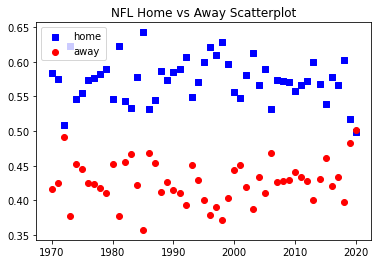

In [20]:
x = [i for i in win_losses.keys()]
home_y = [s[0] for s in win_losses.values()]
away_y = [s[1] for s in win_losses.values()]

plt.scatter(x, home_y, c='b', marker="s", label='home')
plt.scatter(x, away_y, c='r', marker="o", label='away')
plt.title("NFL Home vs Away Scatterplot")
plt.legend(loc='upper left')
plt.savefig("Scatter Plot Home Away.png")
plt.show()


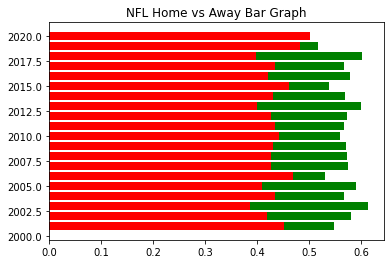

In [21]:
plt.barh(x[-20:],home_y[-20:],color="g",label='home')
plt.barh(x[-20:],away_y[-20:],color="r",label='away')
plt.title("NFL Home vs Away Bar Graph")
plt.savefig("Bar Graph Home Away.png")
plt.show()

In [15]:
def grab_wins_basketball(year):
    url = "https://www.espn.com/nba/standings/_/season/"+ str(year)
    page = requests.get(url)

    soup = BeautifulSoup(page.content, 'html.parser')

    # print(soup)
    rows = soup.find_all('tr')
    # print(rows)

    relevant_rows = []

    values = []

    for row in rows:
        each_column = row.find_all('td')
        if len(each_column) > 1:
            information = []
            for item in each_column:
                information.append(item.string)
            values.append(information)
    
    home_wins_total = 0
    home_losses_total = 0

    away_wins_total = 0
    away_losses_total = 0
    
    
    for row in values:
        home_list = row[4].split("-")
        away_list = row[5].split("-")
        
        home_wins_total += int(home_list[0])
        home_losses_total += int(home_list[1])
        away_wins_total += int(away_list[0])
        away_losses_total += int(away_list[1])
    
    home_win_percentage = home_wins_total / (home_wins_total + home_losses_total)
    away_win_percentage = away_wins_total / (away_wins_total + away_losses_total)
    return home_win_percentage, away_win_percentage

In [5]:
grab_wins_basketball(2013)

(0.611879576891782, 0.38812042310821804)

In [6]:
# b says that its a varaible for basketball
win_percent_totalb = 0
lose_percent_totalb = 0
total_countb = 0

win_lossesb = {}

for year in range(2003, 2021):
    print(year, grab_wins_basketball(year))
    win_lossesb[year] = grab_wins_basketball(year)
    
    result = grab_wins_basketball(year)
    win_percent_totalb += result[0]
    lose_percent_totalb += result[1]
    total_countb += 1


2003 (0.6282590412111018, 0.37174095878889823)
2004 (0.6139613120269134, 0.3860386879730866)
2005 (0.6048780487804878, 0.3951219512195122)
2006 (0.6032520325203252, 0.3967479674796748)
2007 (0.5910569105691057, 0.4089430894308943)
2008 (0.6008130081300813, 0.3991869918699187)
2009 (0.608130081300813, 0.39186991869918697)
2010 (0.5943089430894309, 0.4056910569105691)
2011 (0.6040650406504066, 0.3959349593495935)
2012 (0.5858585858585859, 0.41414141414141414)
2013 (0.611879576891782, 0.38812042310821804)
2014 (0.5804878048780487, 0.4195121951219512)
2015 (0.5747967479674797, 0.42520325203252035)
2016 (0.5886178861788618, 0.4113821138211382)
2017 (0.583739837398374, 0.416260162601626)
2018 (0.5788617886178862, 0.4211382113821138)
2019 (0.5926829268292683, 0.4073170731707317)
2020 (0.5514636449480642, 0.4485363550519358)


In [7]:
print("WIN PERCENT AVG", win_percent_totalb/total_countb)
print("LOSE PERCENT AVG", lose_percent_totalb/total_countb)

WIN PERCENT AVG 0.5942840676581675
LOSE PERCENT AVG 0.40571593234183245


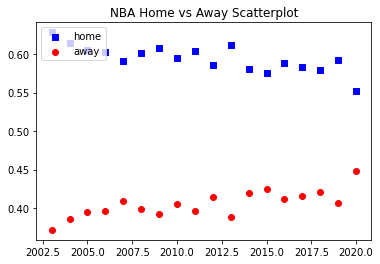

In [14]:
xb = [i for i in win_lossesb.keys()]
home_yb = [s[0] for s in win_lossesb.values()]
away_yb = [s[1] for s in win_lossesb.values()]
plt.title("NBA Home vs Away Scatterplot")
plt.scatter(xb, home_yb, c='b', marker="s", label='home')
plt.scatter(xb, away_yb, c='r', marker="o", label='away')
plt.legend(loc='upper left')
plt.savefig("Scatter Plot Home Away Basketball.png")
plt.show()


In [9]:
print(win_lossesb)

{2003: (0.6282590412111018, 0.37174095878889823), 2004: (0.6139613120269134, 0.3860386879730866), 2005: (0.6048780487804878, 0.3951219512195122), 2006: (0.6032520325203252, 0.3967479674796748), 2007: (0.5910569105691057, 0.4089430894308943), 2008: (0.6008130081300813, 0.3991869918699187), 2009: (0.608130081300813, 0.39186991869918697), 2010: (0.5943089430894309, 0.4056910569105691), 2011: (0.6040650406504066, 0.3959349593495935), 2012: (0.5858585858585859, 0.41414141414141414), 2013: (0.611879576891782, 0.38812042310821804), 2014: (0.5804878048780487, 0.4195121951219512), 2015: (0.5747967479674797, 0.42520325203252035), 2016: (0.5886178861788618, 0.4113821138211382), 2017: (0.583739837398374, 0.416260162601626), 2018: (0.5788617886178862, 0.4211382113821138), 2019: (0.5926829268292683, 0.4073170731707317), 2020: (0.5514636449480642, 0.4485363550519358)}


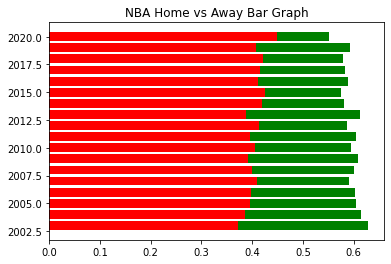

In [13]:
plt.barh(xb[-20:],home_yb[-20:],color="g",label='home')
plt.title("NBA Home vs Away Bar Graph")
plt.barh(xb[-20:],away_yb[-20:],color="r",label='away')

plt.savefig("Bar Graph Home Away NBA.png")
plt.show()

In [ ]:
home_percent_totalb = 0
away_percent_totalb = 0
for year in win_lossesb:
    